# TUGAS BESAR IF2220 PROBABILITAS DAN STATISTIKA 
Gede Prasidha Bhawarnawa - 13520004
Aditya Prawira Nugroho - 13520049

In [2]:
# INFORMASI UMUM TUGAS DAN SPESIFIKASI
# Pemanggilan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_csv('water_potability.csv', index_col=0)

In [4]:
# NOMOR 1
# Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
# numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
# maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

# Catatan : Jika menggunakan Visual Studio Code untuk membuka file ini, maka mungkin dibutuhkan sebuah text editor terpisah untuk menampilkan semua hasil perhitungan
print("Jawaban Nomor 1:")
print("Pilihan kolom yang dapat diperiksa ", end="")
for columnName in data.columns[:-2]:
    print(columnName, end=", ")
print(data.columns[-2])
idxColumn = input("Masukkan nama kolom yang ingin dicari deskripsi statistikanya: ")
hasOutputResult = False
while not(hasOutputResult):
    if idxColumn in data.columns[:-1]:
        hasOutputResult = True
        print("Berikut adalah data deskripsi statistika dari kolom {}:".format(idxColumn))
        print("Mean: {mean}".format(mean=data[idxColumn].mean()))
        print("Median: {median}".format(median=data[idxColumn].median()))
        # Cek dulu apakah terdapat data yang muncul lebih dari sekali dalam dataset, bila tidak maka modus tidak ada
        if (len(data[idxColumn].value_counts()) == len(data[idxColumn])):
            print("Dari {allValues} pada tabel {idxColumn}, terdapat {uniqueValues} nilai unik".format(allValues=len(data[idxColumn]), idxColumn=idxColumn, uniqueValues=len(data[idxColumn].value_counts())))
            print("Karena jumlahnya sama, maka tidak ada modus")
        else:
            print("Terdapat sejumlah data yang menjadi modus pada kolom data {idxColumn}".format(idxColumn=idxColumn))
            print("Jumlah modusnya adalah {qtyMode} data dengan jumlah occurence sebanyak {occurence} per data".format(qtyMode=len(data[idxColumn].mode()), occurence=(data[idxColumn] == data[idxColumn].mode()[0]).sum()))
            print("Modusnya adalah ", end="")
            for idx in data[idxColumn].mode():
                print(idx, end=", ")
        print("Standar Deviasi: {std}".format(std=data[idxColumn].std()))
        print("Variansi: {var}".format(var=data[idxColumn].var()))
        print("Range: {range}".format(range=data[idxColumn].max() - data[idxColumn].min()))
        print("Nilai Minimum: {min}".format(min=data[idxColumn].min()))
        print("Nilai Maksimum: {max}".format(max=data[idxColumn].max()))
        print("Kuartil 1,2,3: {q1}, {q2}, {q3}".format(q1=data[idxColumn].quantile(0.25), q2=data[idxColumn].quantile(0.5), q3=data[idxColumn].quantile(0.75)))
        print("IQR: {iqr}".format(iqr=data[idxColumn].quantile(0.75) - data[idxColumn].quantile(0.25)))
        print("Skewness: {skew}".format(skew=data[idxColumn].skew()))
        print("Kurtosis: {kurt}".format(kurt=data[idxColumn].kurt()))
        print()
    elif idxColumn == "EXIT": # Jika ingin membatalkan program
        hasOutputResult = True
    else:
        print("Kolom {} tidak ditemukan".format(idxColumn))
        idxColumn = input("Masukkan nama kolom yang ingin dicari deskripsi statistikanya: ")

Jawaban Nomor 1:
Pilihan kolom yang dapat diperiksa pH, hardness, solids, chloramines, sulfate, conductivity, organicCarbon, trihalomethanes, turbidity
Berikut adalah data deskripsi statistika dari kolom pH:
Mean: 7.0871927687138285
Median: 7.029490455474185
Dari 2010 pada tabel pH, terdapat 2010 nilai unik
Standar Deviasi: 1.5728029470456655
Variansi: 2.4737091102355304
Range: 13.7725009497978
Nilai Minimum: 0.2274990502021987
Nilai Maksimum: 13.999999999999998
Kuartil 1,2,3: 6.09078502142353, 7.029490455474185, 8.053006240791538
IQR: 1.9622212193680078
Skewness: 0.04853451405270669
Kurtosis: 0.6269041256617065



Jawaban Nomor 2:
Pilihan kolom yang dapat diperiksa pH, hardness, solids, chloramines, sulfate, conductivity, organicCarbon, trihalomethanes, turbidity


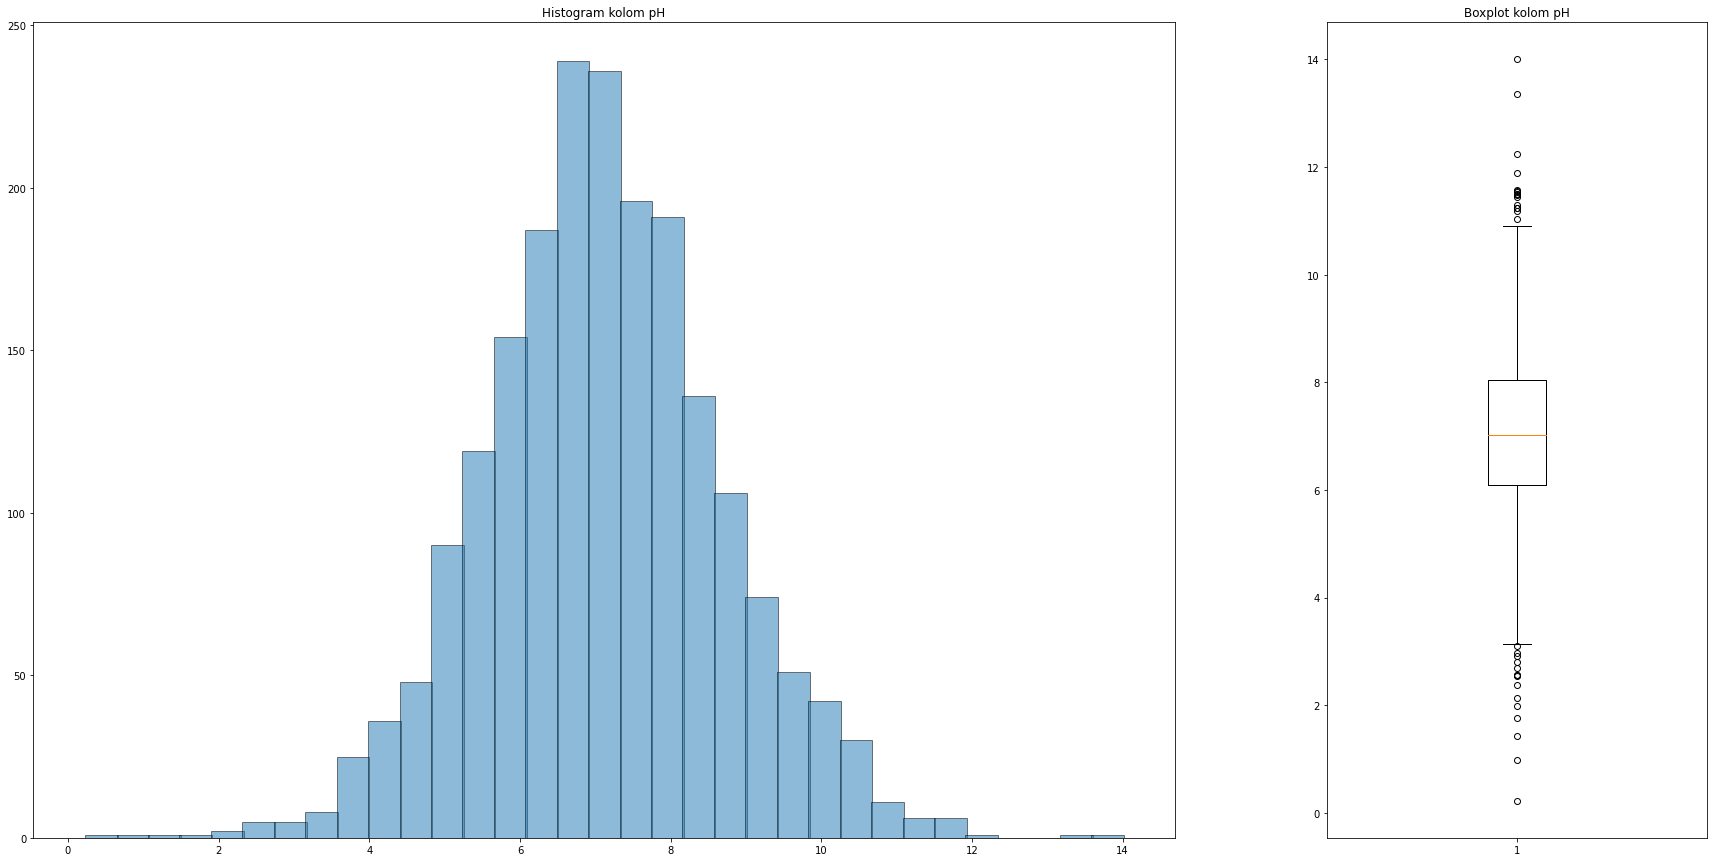

In [30]:
# NOMOR 2
# Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
# kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
# tersebut.
print("Jawaban Nomor 2:")
print("Pilihan kolom yang dapat diperiksa ", end="")
for columnName in data.columns[:-2]:
    print(columnName, end=", ")
print(data.columns[-2])
idxColumn = input("Masukkan nama kolom yang ingin dibuat histogram dan boxplotnya (ketik \"EXIT\" untuk keluar): ")
hasOutputResult = False
figure, axis = plt.subplots(1, 2, figsize=(30, 15), gridspec_kw={'width_ratios': [3, 1]})
while not(hasOutputResult):
    if idxColumn in data.columns:
        hasOutputResult = True
        # Untuk membuat histogram
        # Dimulai dengan menentukan jumlah bin dan width yang tepat dengan menggunakan formula Scott's normal reference rule
        # Alasan penggunaan formula Sturges adalah karena secara implisit diasumsikan data yang dibentuk adalah sebuah distribusi normal
        # Rumus Scott's normal reference rule : h = (3.49 * sigma) / (n ** (1/3))
        # Dengan h adalah width, sigma adalah standar deviasi, dan n adalah jumlah data
        jumlahData = len(data[idxColumn])
        sigma = data[idxColumn].std()
        width = (3.49 * sigma) / (jumlahData ** (1/3))

        axis[0].hist(data[idxColumn].values, bins=math.ceil(data[idxColumn].max() / width), width=width, histtype='bar', ec='black', alpha=0.5)
        axis[0].set_title("Histogram kolom {}".format(idxColumn))

        # Untuk membuat boxplot
        axis[1].boxplot(data[idxColumn])
        axis[1].set_title("Boxplot kolom {}".format(idxColumn))

        plt.show()
        
    elif idxColumn == "EXIT":
        hasOutputResult = True
    else:
        print("Kolom {} tidak ditemukan".format(idxColumn))
        idxColumn = input("Masukkan nama kolom yang ingin dicari histogram dan boxplotnya (ketik \"EXIT\" untuk keluar): ")

In [ ]:
# NOMOR 3
